<div class="alert alert-block alert-info">
    
# Fashion Mnist
## Renana Rimon
    
<div>

In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [5]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df_train['label'] #target
x = df_train.drop(['label'], axis=1).to_numpy() #data
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [85]:
df_train.shape

(60000, 785)

In [86]:
y.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

<div class="alert alert-info" role="alert">
    
## label explaination: <br>
**0 = T-shirt/top <br>
1 = Trouser<br>
2 = Pullover<br>
3 = Dress<br>
4 = Coat<br>
5 = Sandal<br>
6 = Shirt<br>
7 = Sneaker<br>
8 = Bag<br>
9 = Ankle boot**
    
<div>

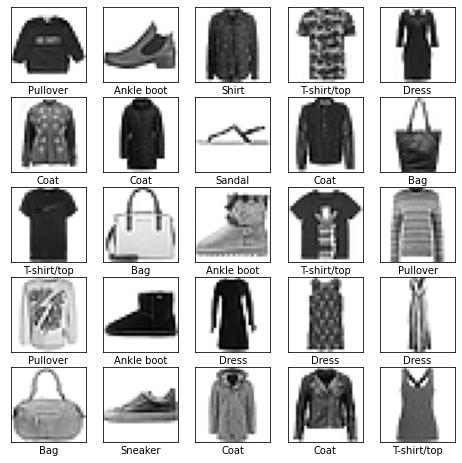

In [87]:
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
target = df_train[['label']].iloc[:, :]

plt.figure(figsize=(8,8))
# Show only the first 25 pictures
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(df_train.drop(['label'],axis=1).iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target.label.iloc[i]])

In [6]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(df_train.shape[0]):
    # Extract the label for comparison
    if df_train['label'][i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif df_train['label'][i] == 1:
        results.append('Trouser')
    elif df_train['label'][i] == 2:
        results.append('Pullover')
    elif df_train['label'][i] == 3:
        results.append('Dress')
    elif df_train['label'][i] == 4:
        results.append('Coat')
    elif df_train['label'][i] == 5:
        results.append('Sandal')
    elif df_train['label'][i] == 6:
        results.append('Shirt')
    elif df_train['label'][i] == 7:
        results.append('Sneaker')
    elif df_train['label'][i] == 8:
        results.append('Bag')
    elif df_train['label'][i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(pca_df['label'][i]))

# Create a new column named result which has all meaningful results        
df_train['result'] = results

<div class="alert alert-block alert-warning">


### ploting 2D & 3D graphs
#### In the plots it can be seen that even with only 2 or 3 features, there is a division of the labels.
    
<div>

In [7]:
features = ['pixel' + str(i+1) for i in range(784) ]
# Set first three principle components
pca3 = PCA(n_components=3)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
pca_result = pca3.fit_transform(df_train[features].values)


In [8]:
df_train['1D'] = pca_result[:,0]
df_train['2D'] = pca_result[:,1] 
df_train['3D'] = pca_result[:,2]

In [9]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,result,1D,2D,3D
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Pullover,940.014979,1264.934899,-13.064104
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Ankle boot,-1115.990760,984.569965,-497.105427
2,6,0,0,0,0,0,0,0,5,0,...,43,0,0,0,0,0,Shirt,1852.613740,400.032947,590.385758
3,0,0,0,0,1,2,0,0,0,0,...,0,1,0,0,0,0,T-shirt/top,823.085923,-592.940376,-165.572054
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Dress,1057.325178,-1029.965513,-386.387929


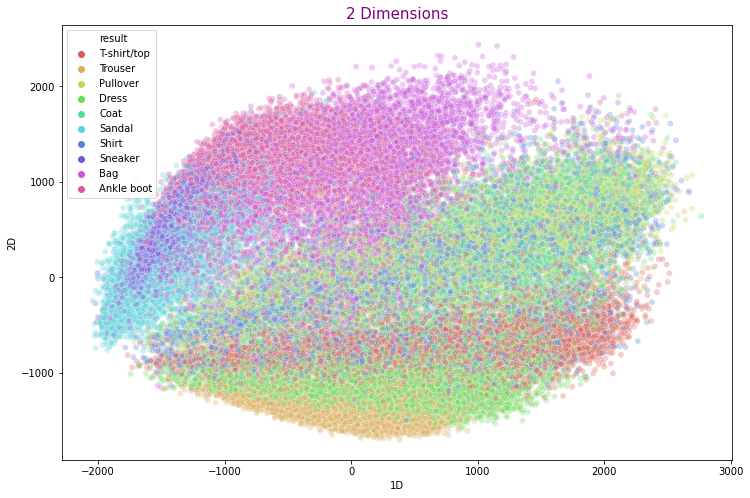

In [100]:
plt.figure(figsize=(12,8))
plt.title('2 Dimensions', fontdict= {'fontsize':15, 'color' : 'Purple'})
sns.scatterplot(
    x="1D", y="2D",
    hue = "result",
    hue_order = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'],
    palette=sns.color_palette("hls", 10),
    data=df_train,
    legend="full",
    alpha=0.3
)

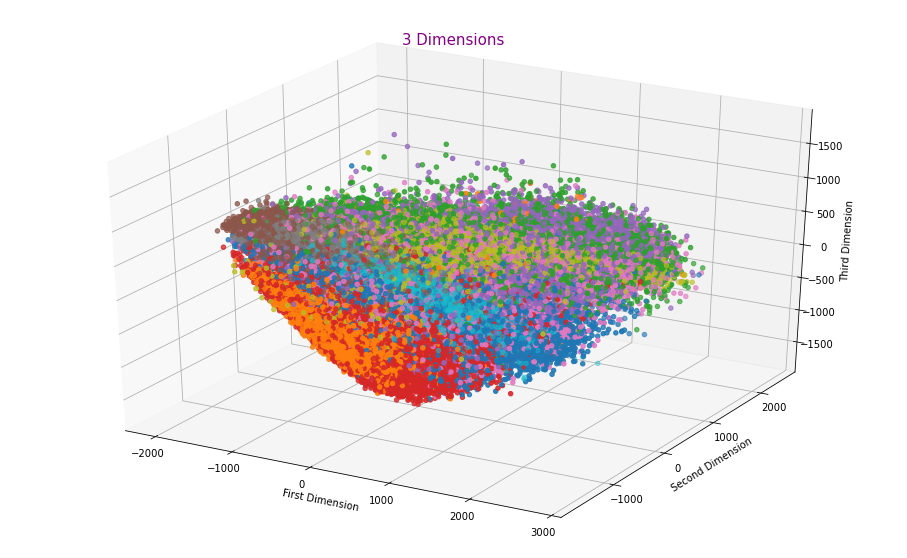

In [107]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
plt.title('3 Dimensions', fontdict= {'fontsize':15, 'color' : 'Purple'}, loc='center')
graph.scatter(
    xs=df_train["1D"], 
    ys=df_train["2D"], 
    zs=df_train["3D"], 
    c=df_train["label"], 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

<div class="alert alert-block alert-warning">


### Number of Fitures
    
The graph below shows the ideal amount of features for a particular accuracy, <br> We prefer to take the smallest number of features, which gives the highest accuracy.<br>
to reach round 90% accuracy, we need round 100 fitures.<br>
Over 100 features, accuracy increases at a slow pace.<br>
Therefore, we will not use more than 100 features.
<br> the choosen number of fitures is 15, that gives 85% of accuracy.
   * original image: 785 = 28*28
   * new image: 16 = 4*4 <br>
   
*~ for visualization we will take 16 fitures, for models take 15 ~*
       

**from the next graph and HeatMap, It can be concluded that low number of fitures are important to prediction. <br>
therefore, we can take only 15 fitures.**
<div> 

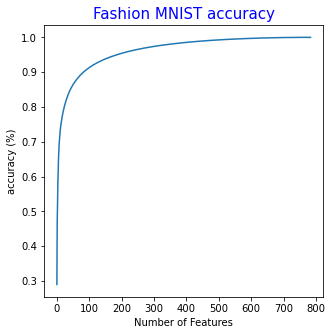

In [111]:
# fit the PCA with the training data
pca = PCA().fit(X_train)

# Plot the cumulative sum of eigenvalues
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('accuracy (%)') #for each component
plt.title('Fashion MNIST accuracy',fontdict= {'fontsize':15, 'color' : 'blue'} )
plt.show()

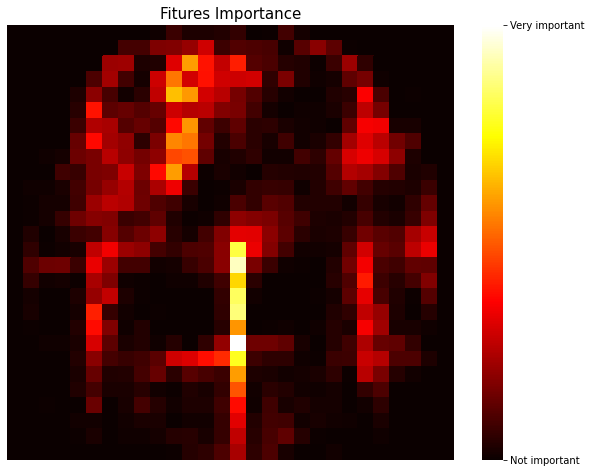

In [120]:
model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model.fit(X_train, y_train)

importances = model.feature_importances_
pixels = np.reshape(importances,(28,28))

plt.figure(figsize= (10,8))
plot = sns.heatmap(pixels,cmap=plt.cm.hot)
plt.xticks([], [])
plot.set_yticks([])
plot.set_yticks([], minor=True)
colorbar = plot.collections[0].colorbar
colorbar.set_ticks([0,max(importances)])
colorbar.set_ticklabels(['Not important','Very important'])
plt.title('Fitures Importance',size = 15)
plt.show()

<div class="alert alert-block alert-warning">

### vizuallization of Original_Image vs Image_after_PCA
<div>

In [23]:
pca = PCA(n_components=16)
X_train_reduced = pca.fit_transform(X_train)

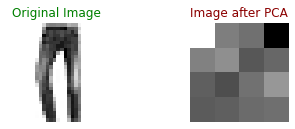

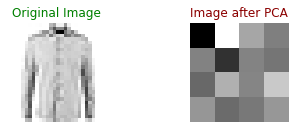

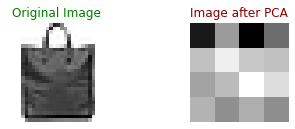

In [47]:
for i in range(3):
    plt.figure(figsize=(6,4))
    plt.subplot(2, 2, 1)
    plt.imshow(X_test[i].reshape(28,28), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_train_reduced[i].reshape(4,4), cmap="gist_yarg")
    plt.title("Image after PCA", color = "Darkred")
    plt.axis("off")
    plt.show()
    

<div class="alert alert-block alert-warning">
    
## Selecting a Kernel and Tuning Hyperparameters
   1. scaling
   2. pca (n_components=15)
   3. GridSearch: find best parameters in each model
   4. compare models
    
<div>

In [12]:
X_scaled = StandardScaler().fit_transform(X_train)
pca = PCA(n_components=15)
X_train_reduced = pca.fit_transform(X_scaled)
Kfolds = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)

In [ ]:
model_params = {
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 150],
            'max_depth': [10,20,50,80,100]
        }
    },
    
    'logistic_regression':{
        'model': LogisticRegression(multi_class= 'auto'),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C': [0.1, 0.5, 1.0]
        }
    },
    
    'xgb':{
        'model': XGBClassifier(eval_metric='mlogloss'),
        'params':{
            'n_estimators': [100, 150],
            'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]            
        }
    },
    
    'knn':{
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5,7,10, 15],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    }
}

In [18]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = Kfolds, return_train_score= False)
    clf.fit(X_train_reduced, y_train)
    scores.append({
        'model': model_name,
        'best_score': cl.best_score_,
        'best_params': cl.best_params_
    })

In [20]:
score_df = pd.DataFrame(scores)
score_df

,model,best_score,best_params
0,random_forest,0.838238,"{'max_depth': 80, 'n_estimators': 150}"
1,logistic_regression,0.784095,"{'C': 1.0, 'solver': 'newton-cg'}"
2,xgb,0.841071,"{'learning_rate': 0.2, 'n_estimators': 150}"
3,knn,0.827071,"{'algorithm': 'auto', 'n_neighbors': 7}"


**after finding best parameters, we will use them to get to best score.<br> 'xgb' and 'random_forest' got the best score, therefore we will use both.**

<div class="alert alert-block alert-warning">
    
### pipeLine: 
   * scale by StandardScaler
   * dimentionality reduction by PCA
   * fit
   * score
<div>
    
    
**first test on train data (split to train & test),<br> and after choosing the best model test on the final test data.**

In [13]:
def pipe(model):
    p = Pipeline([('scaler', StandardScaler()),
                ('pca', PCA(n_components=15)),
                ('mod', model)])
    p.fit(X_train, y_train)
    return round(p.score(X_test, y_test),4)

In [14]:
xgb = pipe(XGBClassifier(learning_rate=0.2, n_estimators=150))
xgb

[16:12:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8472

In [24]:
randomForest = pipe(RandomForestClassifier(max_depth=80, n_estimators=150))
randomForest

0.8467

In [34]:
#stacking
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=15)),
    ('stack', StackingClassifier([
        ('rf', RandomForestClassifier(max_depth=80, n_estimators=150)),    
        ('knn', KNeighborsClassifier(n_neighbors=7, algorithm='auto'),
        ('xgb', XGBClassifier(eval_metric='mlogloss', learning_rate=0.2, n_estimators=150))
        )]))])

pipeline.fit(X_train, y_train)
round(pipeline.score(X_test, y_test),4)

0.8475

In [16]:
#voting
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=15)),
    ('clf', VotingClassifier([
        ('rf', RandomForestClassifier(max_depth=80, n_estimators=150)),
        ('knn',KNeighborsClassifier(n_neighbors=7, algorithm='auto')),
        ('xgb', XGBClassifier(learning_rate=0.2, n_estimators=150))],voting='soft'))])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
round(pipeline.score(X_test, y_test),4)

[16:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8527

<div class="alert alert-block alert-success">

## *#1_conclusions:*

*after dimensionality reduction with PCA, from **784** features to **15** features.*

### accuracy:

   * RandomForestClassifier: 0.8467
   * xgb: 0.8472
   * stacking: 0.8475
   * voting: 0.8538
   
   
### best model: *voting 85% accuracy*
    
    
<div>

<div class="alert alert-block alert-warning">

    
### Test 'voting' model on final Test Data

    
<div>

In [38]:
X_train_f = x
y_train_f = y

y_test_f = df_test['label'] #target
X_test_f = df_test.drop(['label'], axis=1).to_numpy() #data

In [40]:
#voting
pipeline = Pipeline([
    ('scaler' , StandardScaler()),
    ('pca', PCA(n_components=15)),
    ('clf', VotingClassifier([
        ('rf', RandomForestClassifier(max_depth=80, n_estimators=150)),
        ('knn',KNeighborsClassifier(n_neighbors=7, algorithm='auto')),
        ('xgb', XGBClassifier(eval_metric='mlogloss', learning_rate=0.2, n_estimators=150))],voting='soft'))])

pipeline.fit(X_train_f, y_train_f)
y_pred = pipeline.predict(X_test_f)
round(pipeline.score(X_test_f, y_test_f),4)

0.8526

In [42]:
report = classification_report(y_test_f, y_pred, output_dict=True)
df_report = pd.DataFrame(report)
df_report

,0,1,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.794872,0.982600,0.790239,0.864472,0.762488,0.927813,0.676040,0.874755,0.95374,0.888889,0.8526,0.851591,0.851591
recall,0.837000,0.960000,0.761000,0.893000,0.809000,0.874000,0.601000,0.894000,0.96900,0.928000,0.8526,0.852600,0.852600
f1-score,0.815392,0.971168,0.775344,0.878505,0.785056,0.900103,0.636316,0.884273,0.96131,0.908023,0.8526,0.851549,0.851549
support,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,0.8526,10000.000000,10000.000000


Text(0.5, 1.0, 'Confusion matrix voting\n')

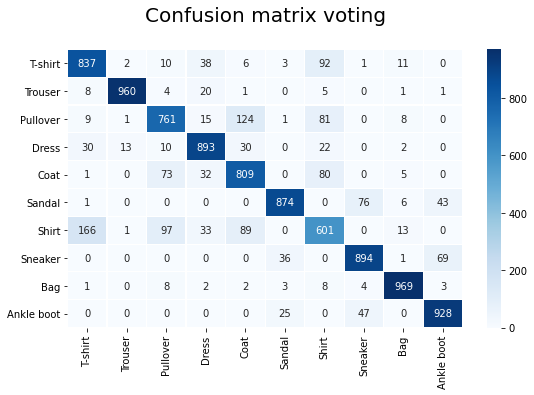

In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,5))
cnf_matrix = confusion_matrix(y_test_f, y_pred)

# create seabvorn heatmap with required labels
axis_labels = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # labels for x-axis
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="Blues" , fmt='g', xticklabels=axis_labels, yticklabels=axis_labels, linewidths=0.1)

plt.tight_layout()
plt.title('Confusion matrix voting\n',fontsize=20)

<div class="alert alert-block alert-success">
    
## *#2_conclusions:*
    
## voting: 85% accuracy with 15 features
    
### NOTE: the model is tested only once in the final test data to maintain purity!